In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
def get_angles(pos, i, d_model:np.float32):
    # div term 
    # i // 2 - pe uses sin and cos computation on both even and odd location, 512 indices in total
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model) 
    return pos * angle_rates

In [15]:
# print(np.arange(10)[:, np.newaxis].shape)
# print(np.arange(10)[np.newaxis, :].shape)

def positional_encoding(position, d_model: np.float32):
    # angle radians
    angle_rads = get_angles(
        np.arange(position)[:, np. newaxis],   # shape -> (pos, 1) , meaning there are n positions (n rows), and each of which contains 1 element (1 col)
        np.arange(d_model)[np.newaxis, :],   # shape -> (1, d_model)
        d_model
    )

    # sinusoidal result regards even indices
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # cosinusoidal result regards odd indices
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...] # convert the angle_rads to tensor with shape (1, ...)

    return tf.cast(pos_encoding, dtype=tf.float32)

In [24]:
tokens= 50
dimensions = 64
pos_encoding = positional_encoding(tokens, dimensions)
pos_encoding.shape

TensorShape([1, 50, 64])

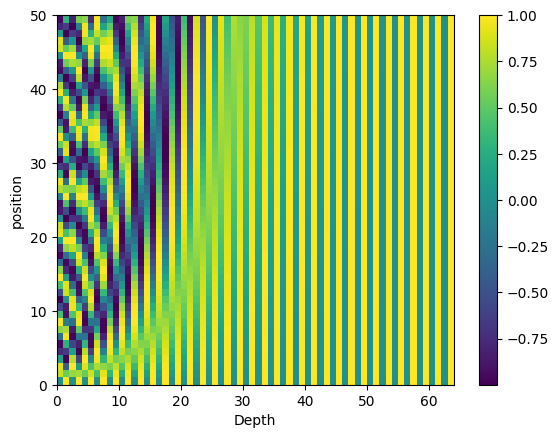

In [25]:
# plot 
plt.pcolormesh(pos_encoding[0], cmap="viridis")
plt.xlabel("Depth")
plt.xlim((0, dimensions))
plt.ylabel("position")
plt.colorbar()
plt.show()

# Interactive plot


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [58]:
sequence_length = 6
encoding_dim = 8

In [59]:
def get_positional_encoding(sequence_length, encoding_dim):
    pos_encoding = np.zeros((sequence_length, encoding_dim))
    for pos in range(sequence_length):
        for i in range(0, encoding_dim, 2):
            # even 
            pos_encoding[pos, i] = np.sin(pos / 10000 ** (2 * i / encoding_dim))
            # odd
            pos_encoding[pos, i + 1] = np.cos(pos / 10000**(2 * (i + 1) / encoding_dim))
        return pos_encoding

In [60]:
pos_encoding = get_positional_encoding(sequence_length, encoding_dim)

In [61]:
def plot_encoding(token_index):
    plt.figure(figsize=(15, 2))
    x = np.arange(sequence_length)
    for i in range(encoding_dim):
        plt.subplot(1, encoding_dim, i+1)
        y = np.sin(x / 10000**(2 * i / encoding_dim)) if i % 2 == 0 else np.cos(x / 10000**(2 * i / encoding_dim))
        plt.plot(x, y)
        plt.scatter([token_index], [pos_encoding[token_index, i]], color="red")
        plt.xlabel(f"Position{i}")
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [62]:
interact(plot_encoding, token_index=(0, sequence_length-1, 1))

interactive(children=(IntSlider(value=2, description='token_index', max=5), Output()), _dom_classes=('widget-i…

<function __main__.plot_encoding(token_index)>

In [69]:
import tensorflow as tf
# from tensorflow.keras.utils import plot_model

from tensorflow.keras.utils import plot_model

sequence_length = 50  # 序列長度
embed_size = 512     # 嵌入維度

# 定義輸入
inputs = tf.keras.Input(shape=(sequence_length,))

# 使用 Embedding 層作為可學習式位置編碼
position_embedding_layer = tf.keras.layers.Embedding(input_dim=sequence_length, output_dim=embed_size, name='PE')
position_embeddings = position_embedding_layer(inputs) # 形狀為 (batch_size, sequence_length, embed_size)

# 你的其他模型部分，例如一個嵌入層，可以用於處理實際的輸入序列
embedding_layer = tf.keras.layers.Embedding(input_dim=sequence_length, output_dim=embed_size, name='WE')
word_embeddings = embedding_layer(inputs) # 形狀為 (batch_size, sequence_length, embed_size)

# 將位置編碼(PE)和單詞嵌入(WE)相加
x = tf.add(word_embeddings, position_embeddings, name='add')
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# # 創建模型
# model = tf.keras.Model(inputs, outputs)

# # 模型摘要
# plot_model(model)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
